# objective:--> The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil This is a usecase where we aim to find the hours of absenteeism at work, using features, provided in database.

In [2]:
#importing libraries for visiualizing and understanding dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
abs_df=pd.read_excel('Absenteeism_at_work.xls')

# Finding insights of the data and what it consist of

In [4]:
abs_df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [5]:
abs_df.tail()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271219,...,0,1,1,0,0,1,77,175,25,0


# Attribute Information

1. Individual identification (ID)

2. Reason for absence (ICD).

Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:
I Certain infectious and parasitic diseases
II Neoplasms
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
IV Endocrine, nutritional and metabolic diseases
V Mental and behavioural disorders
VI Diseases of the nervous system
VII Diseases of the eye and adnexa
VIII Diseases of the ear and mastoid process
IX Diseases of the circulatory system
X Diseases of the respiratory system
XI Diseases of the digestive system
XII Diseases of the skin and subcutaneous tissue
XIII Diseases of the musculoskeletal system and connective tissue
XIV Diseases of the genitourinary system
XV Pregnancy, childbirth and the puerperium
XVI Certain conditions originating in the perinatal period
XVII Congenital malformations, deformations and chromosomal abnormalities
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
XIX Injury, poisoning and certain other consequences of external causes
XX External causes of morbidity and mortality
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).

3. Month of absence

4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))

5. Seasons (summer (1), autumn (2), winter (3), spring (4))

6. Transportation expense

7. Distance from Residence to Work (kilometers)

8. Service time

9. Age

10. Work load Average/day

11. Hit target

12. Disciplinary failure (yes=1; no=0)

13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))

14. Son (number of children)

15. Social drinker (yes=1; no=0)

16. Social smoker (yes=1; no=0)

17. Pet (number of pet)

18. Weight

19. Height

20. Body mass index

21. Absenteeism time in hours (target)

In [6]:
#finding number of rows and columns present in the dataset
abs_df.shape

(740, 21)

In [7]:
#finding the information about the dataset
abs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [8]:
#All the attributes are of integer64 data_type 

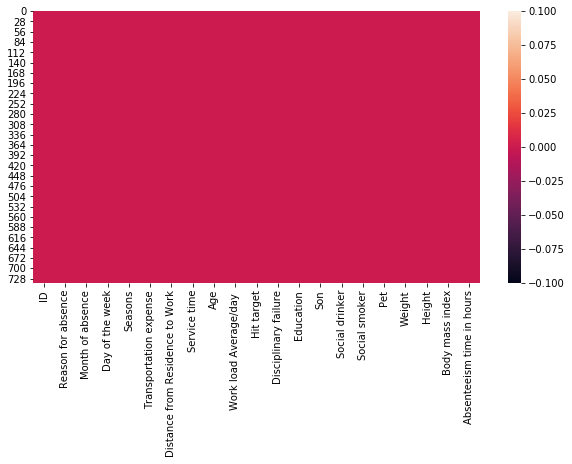

In [9]:
#Cheking the nul values
plt.figure(figsize=(10,5))
sns.heatmap(abs_df.isnull())

In [10]:
#there is no null values present in the dataset

# Bivariate Analysis

Text(0.5, 1.0, 'Count of Reason for absence')

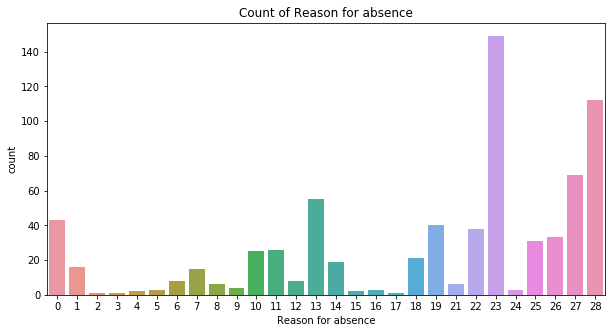

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(abs_df['Reason for absence'])
plt.title('Count of Reason for absence')

the graph shows that people have taken more leave for medical consultation (23)

Text(0.5, 1.0, 'Count of Month of absence')

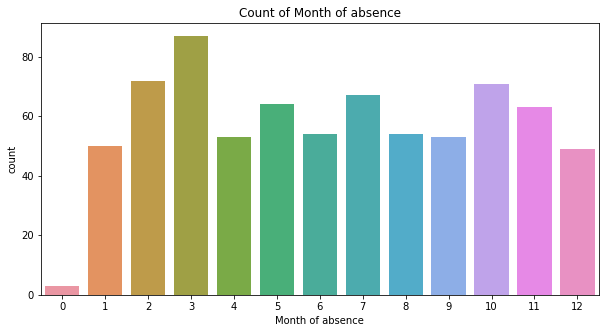

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(abs_df['Month of absence'])
plt.title('Count of Month of absence')

In the month of April there are more number of absentees 

Text(0.5, 1.0, 'Count of absentees on each day of the week ')

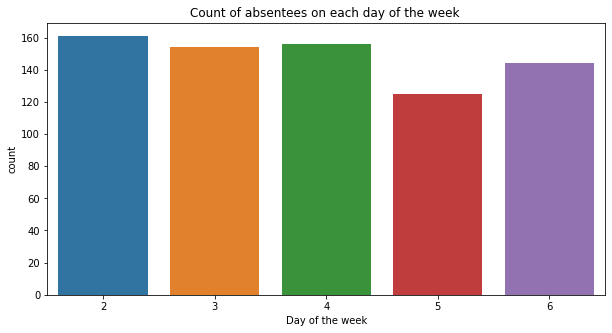

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(abs_df['Day of the week'])
plt.title('Count of absentees on each day of the week ')

On monday most of the people have taken leave

Text(0.5, 1.0, 'Count of absentees in each season ')

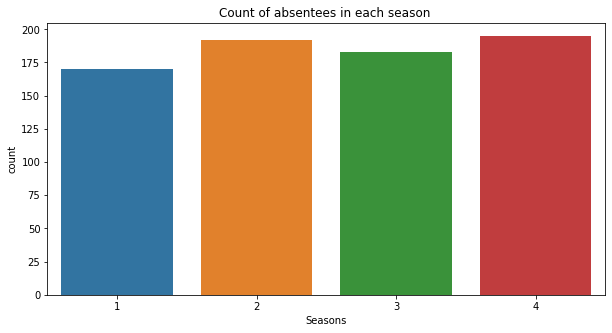

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(abs_df['Seasons'])
plt.title('Count of absentees in each season ')

In autum season most of the people have taken leave

Text(0.5, 1.0, 'Reason of absent according to age')

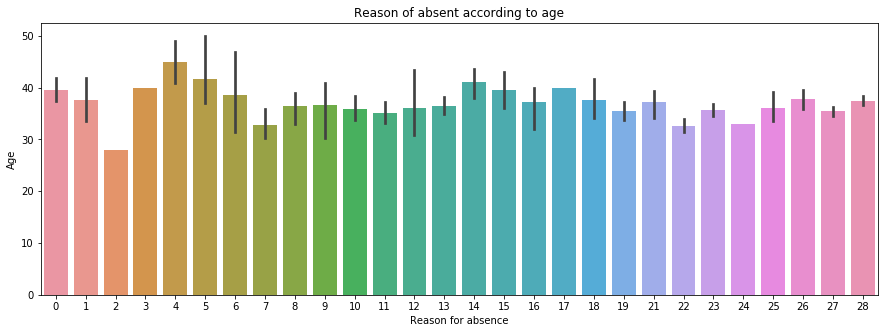

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(abs_df['Reason for absence'],abs_df['Age'])
plt.title('Reason of absent according to age')

Text(0.5, 1.0, 'Reason of absent w.r.t Absenteeism time in hours ')

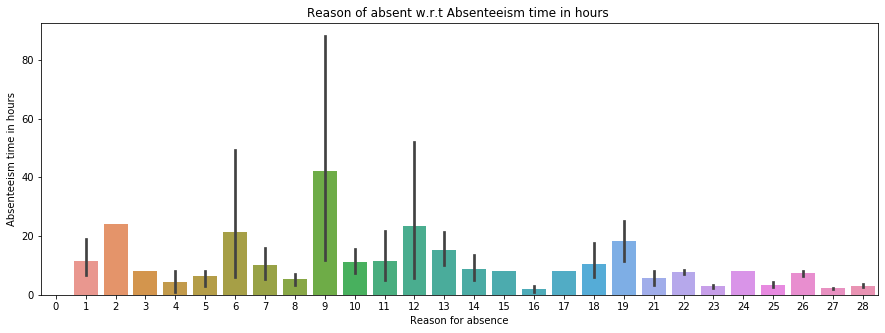

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(abs_df['Reason for absence'],abs_df['Absenteeism time in hours'])
plt.title('Reason of absent w.r.t Absenteeism time in hours ')

Diseases of the circulatory system has more hours of Absenteeism

# Univariate Analysis

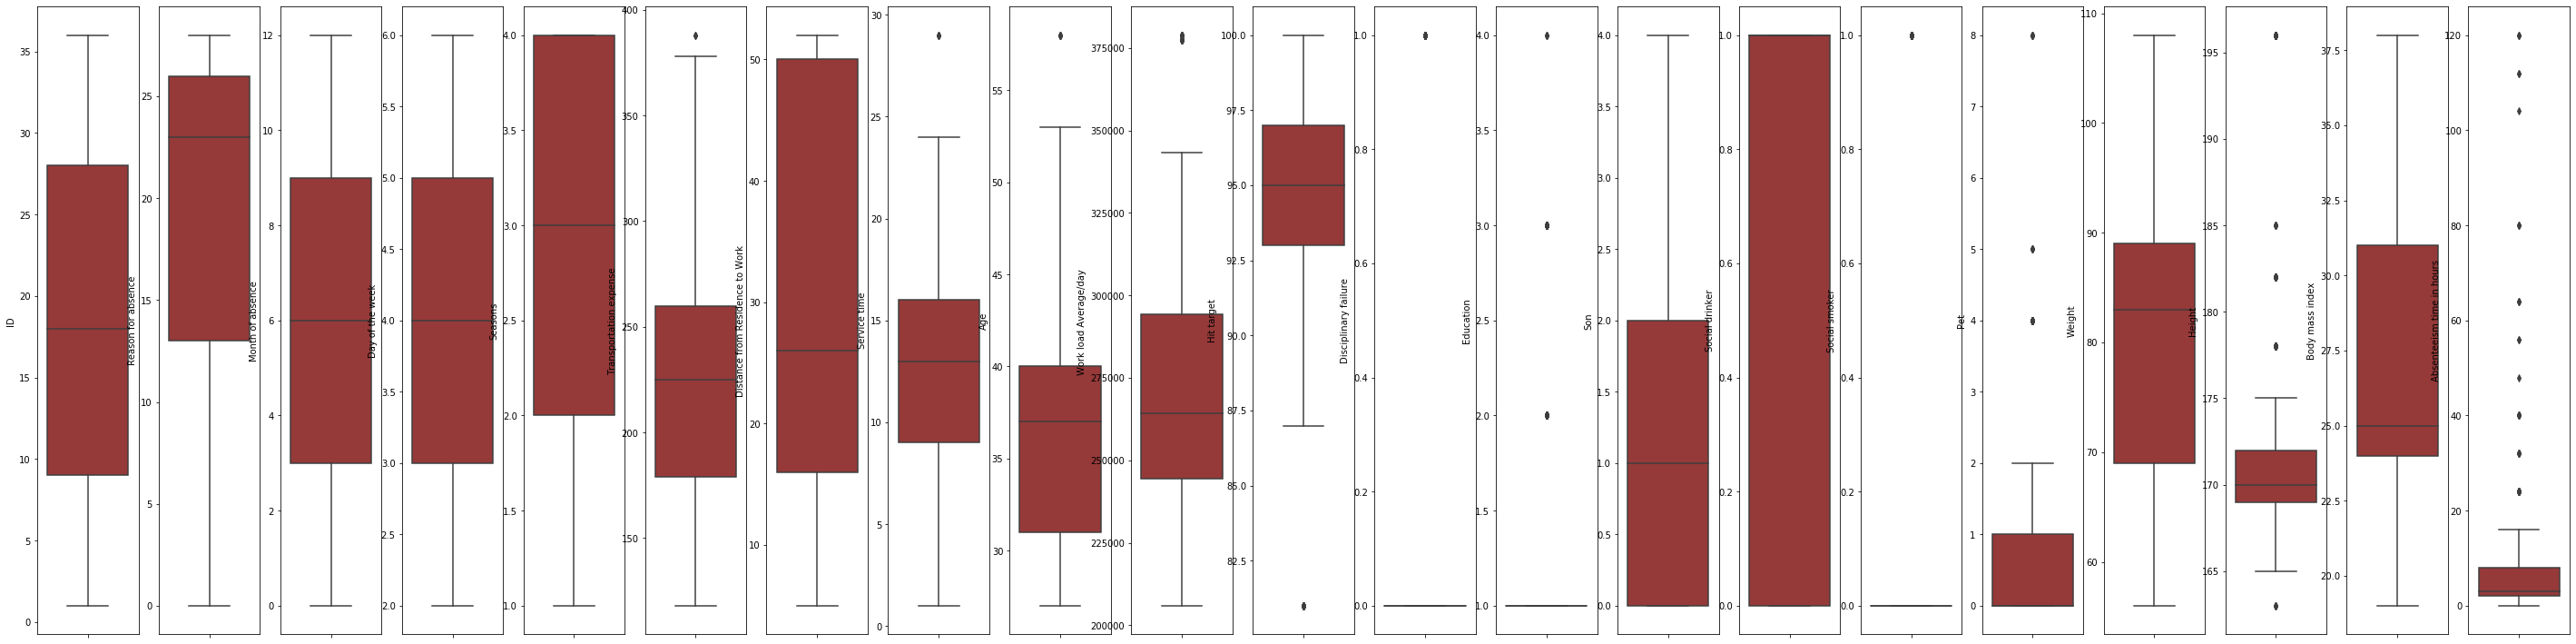

In [17]:
#using boxplot to see outliers and IQR range
collist=abs_df.columns.values
ncol=21
nrows=10
plt.figure(figsize=(50,150))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(abs_df[collist[i]],color='brown',orient='v')

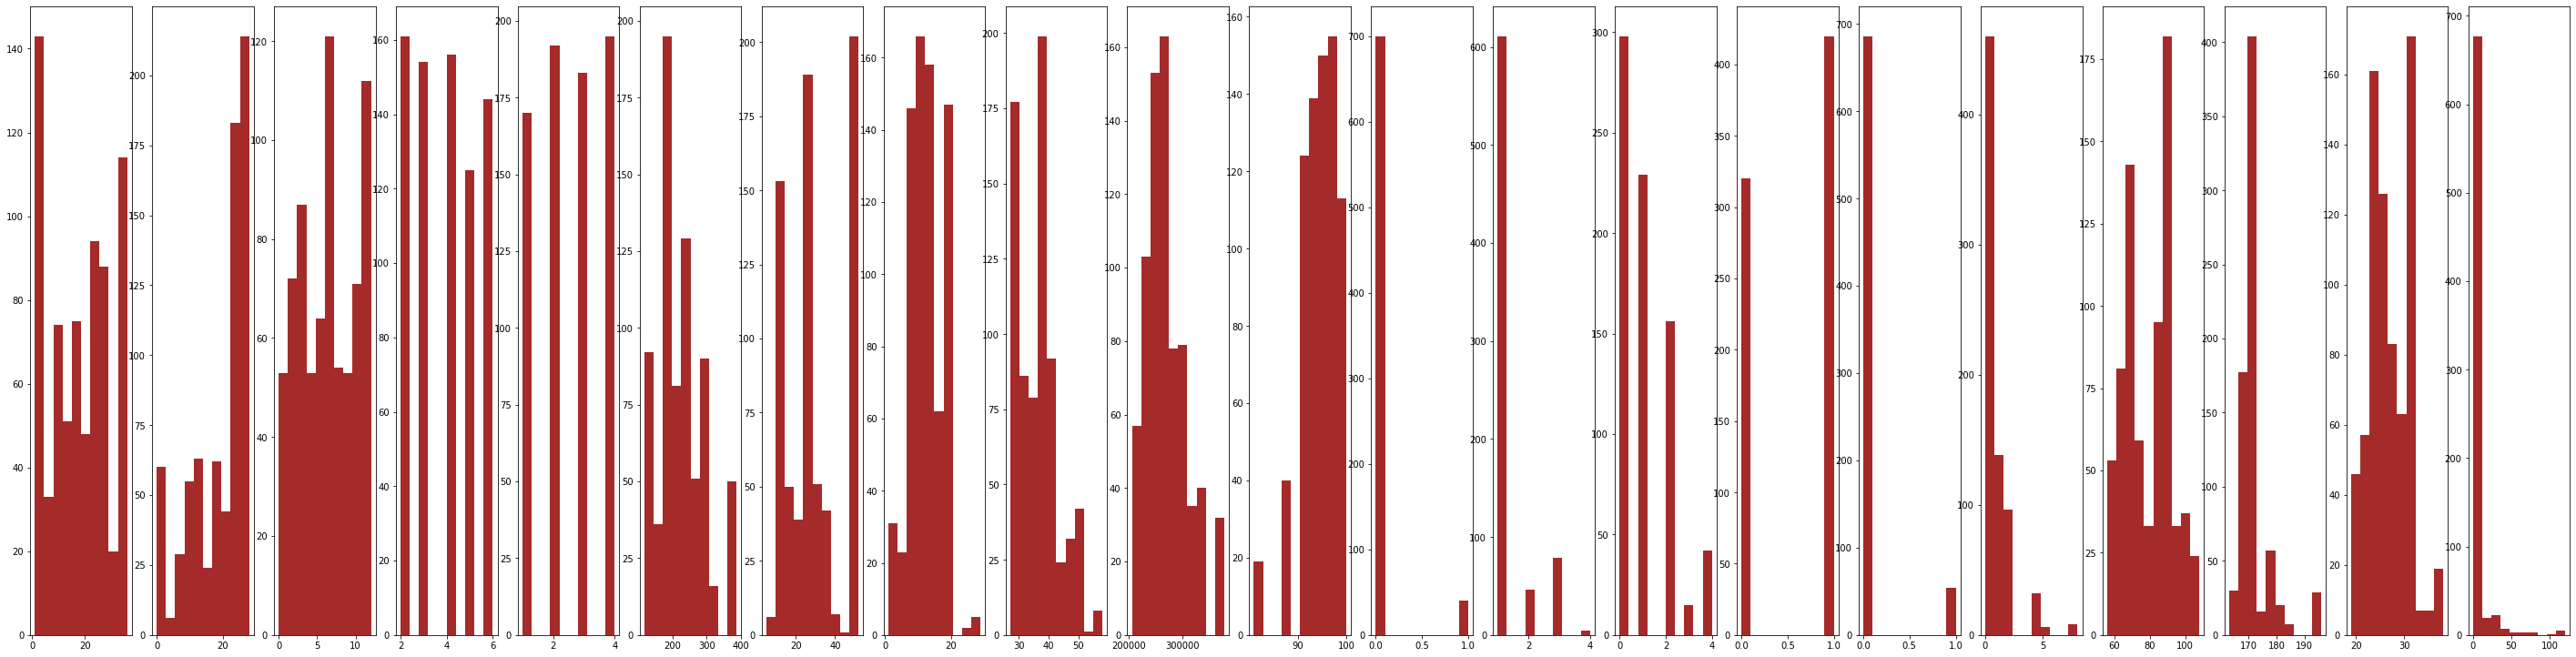

In [18]:
# Cheking the distribution
plt.figure(figsize=(50,150))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    plt.hist(abs_df[collist[i]],color='brown')

# Statistical Analysis

In [19]:
abs_df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


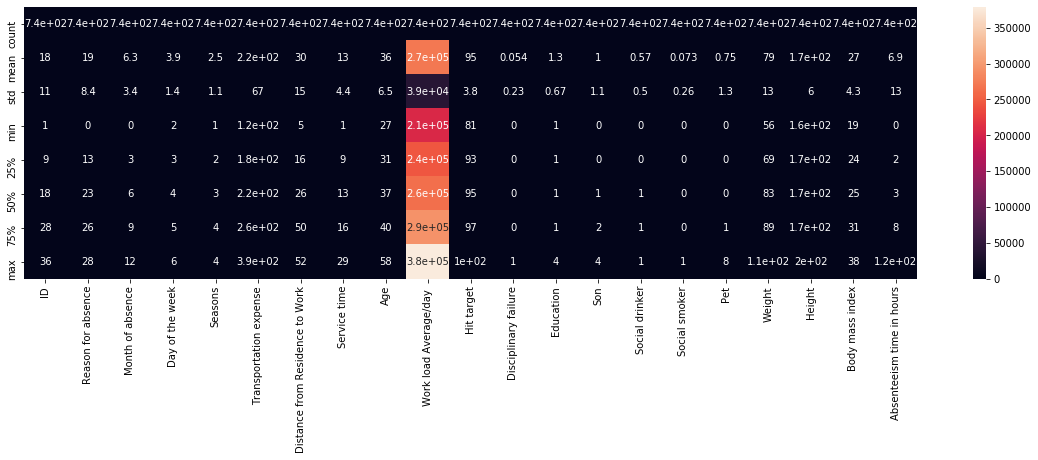

In [20]:
plt.figure(figsize=(20,5))
sns.heatmap(abs_df.describe(),annot=True)

In [21]:
#From above we can see that average time of Absenteeism is 6.9

In [22]:
abs_df.corr()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.064245,-0.000043,0.034468,0.098495,-0.224163,-0.486160,-0.272704,0.040899,0.092457,...,0.004502,-0.036254,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.017997
Reason for absence,-0.064245,1.000000,-0.083858,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,-0.123472,...,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.173116
Month of absence,-0.000043,-0.083858,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,-0.001520,-0.169989,...,0.107946,-0.066128,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.024345
Day of the week,0.034468,0.116319,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.015646,...,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.124361
Seasons,0.098495,-0.117925,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,0.150439,...,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.005615
Transportation expense,-0.224163,-0.119381,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,0.005438,...,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.027585
Distance from Residence to Work,-0.486160,0.161831,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.068677,...,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.088363
Service time,-0.272704,0.048425,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.000668,...,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,0.019029
Age,0.040899,-0.078608,-0.001520,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.039425,...,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,0.065760
Work load Average/day,0.092457,-0.123472,-0.169989,0.015646,0.150439,0.005438,-0.068677,-0.000668,-0.039425,1.000000,...,0.029026,-0.074960,0.027820,-0.033713,0.030968,0.007114,-0.038522,0.103315,-0.090709,0.024749


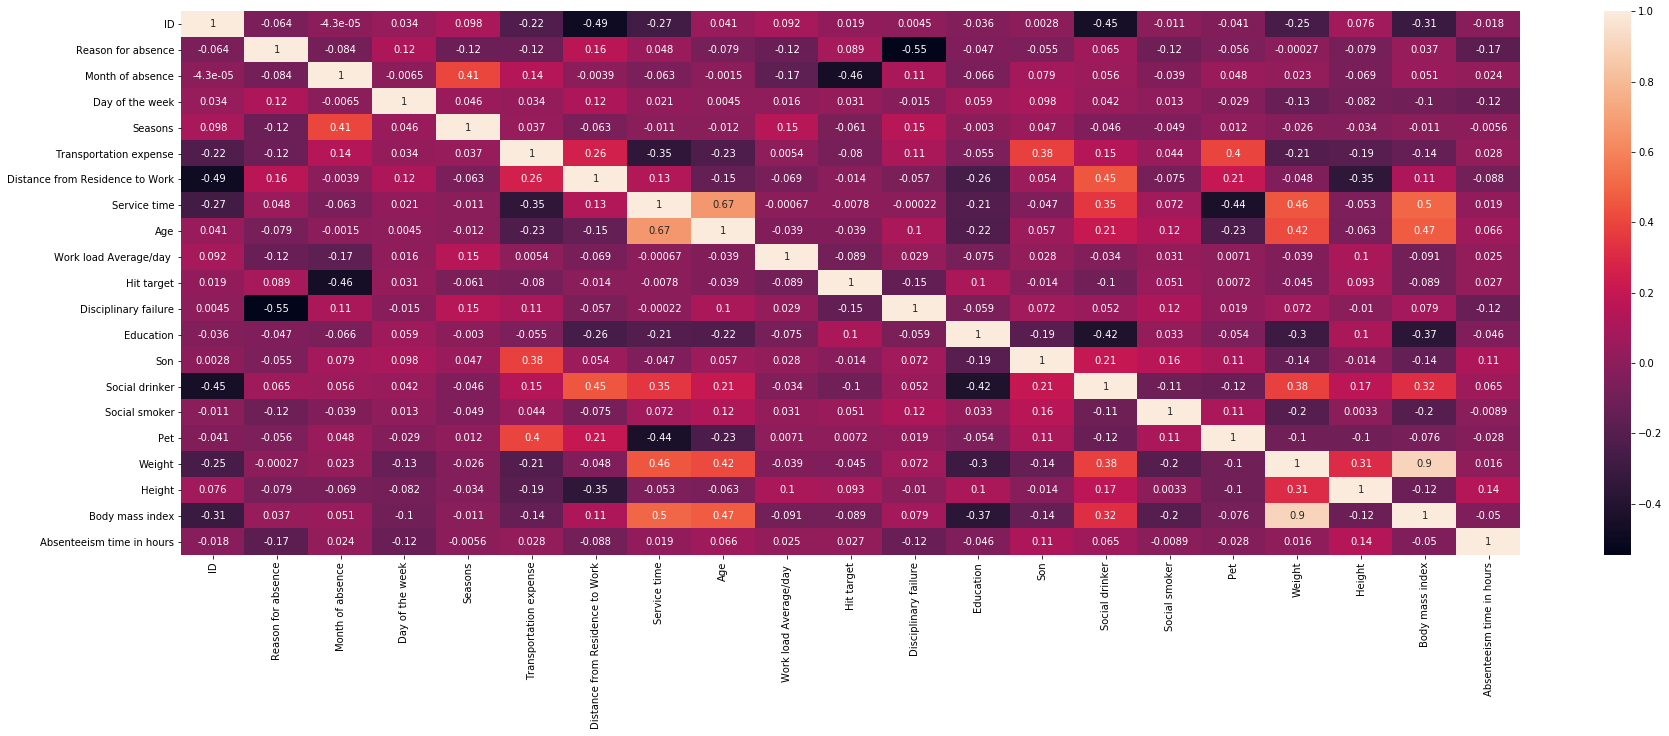

In [23]:
plt.figure(figsize=(30,10))
sns.heatmap(abs_df.corr(),annot=True)

In [24]:
abs_df.cov()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,121.467891,-5.971327,-0.001646,0.540063,1.206929,-165.409048,-79.496893,-13.178894,2.920365,3.979985e+04,...,0.011228,-0.269005,0.033497,-2.466006,-0.031054,-0.601755,-36.096694,5.079170,-14.496348,-2.644136
Reason for absence,-5.971327,71.122335,-2.430165,1.394617,-1.105731,-67.406978,20.249022,1.790733,-4.294993,-4.067091e+04,...,-1.040120,-0.268881,-0.512892,0.273598,-0.253959,-0.621585,-0.029258,-4.034342,1.344622,-19.462641
Month of absence,-0.001646,-2.430165,11.808068,-0.031891,1.557912,31.639871,-0.198186,-0.947189,-0.033829,-2.281512e+04,...,0.083934,-0.152982,0.298321,0.095783,-0.034524,0.216472,1.030538,-1.429726,0.751710,1.115240
Day of the week,0.540063,1.394617,-0.031891,2.021159,0.073490,3.235146,2.489524,0.132484,0.041069,8.687981e+02,...,-0.004864,0.056007,0.153169,0.029441,0.004868,-0.054135,-2.362363,-0.704687,-0.631052,-2.356925
Seasons,1.206929,-1.105731,1.557912,0.073490,1.236168,2.753882,-1.041036,-0.053158,-0.087077,6.532956e+03,...,0.038182,-0.002209,0.057342,-0.025345,-0.014084,0.018111,-0.376400,-0.226374,-0.052560,-0.083224
Transportation expense,-165.409048,-67.406978,31.639871,3.235146,2.753882,4482.600197,260.441159,-102.718795,-98.700677,1.422069e+04,...,1.654683,-2.482032,28.168314,4.816662,0.772929,35.311217,-178.924997,-78.587317,-39.169411,24.620385
Distance from Residence to Work,-79.496893,20.249022,-0.198186,2.489524,-1.041036,260.441159,220.130291,8.570036,-14.023207,-3.979809e+04,...,-0.189774,-2.593117,0.883850,3.326043,-0.291040,4.027934,-9.148049,-31.640923,7.233868,-17.477212
Service time,-13.178894,1.790733,-0.947189,0.132484,-0.053158,-102.718795,8.570036,19.227115,19.061570,-1.144890e+02,...,-0.000219,-0.628790,-0.227005,0.767655,0.082654,-2.545112,25.758585,-1.406082,9.390283,1.112351
Age,2.920365,-4.294993,-0.033829,0.041069,-0.087077,-98.700677,-14.023207,19.061570,41.974493,-9.976488e+03,...,0.152909,-0.967794,0.405548,0.684709,0.205277,-1.974831,34.950338,-2.463126,13.068403,5.679567
Work load Average/day,39799.851073,-40670.911531,-22815.118312,868.798124,6532.955671,14220.689617,-39798.091757,-114.489047,-9976.487551,1.525536e+09,...,256.528545,-1971.094437,1193.624774,-652.777749,314.810964,366.300684,-19383.820181,24352.901236,-15183.072805,12886.347994


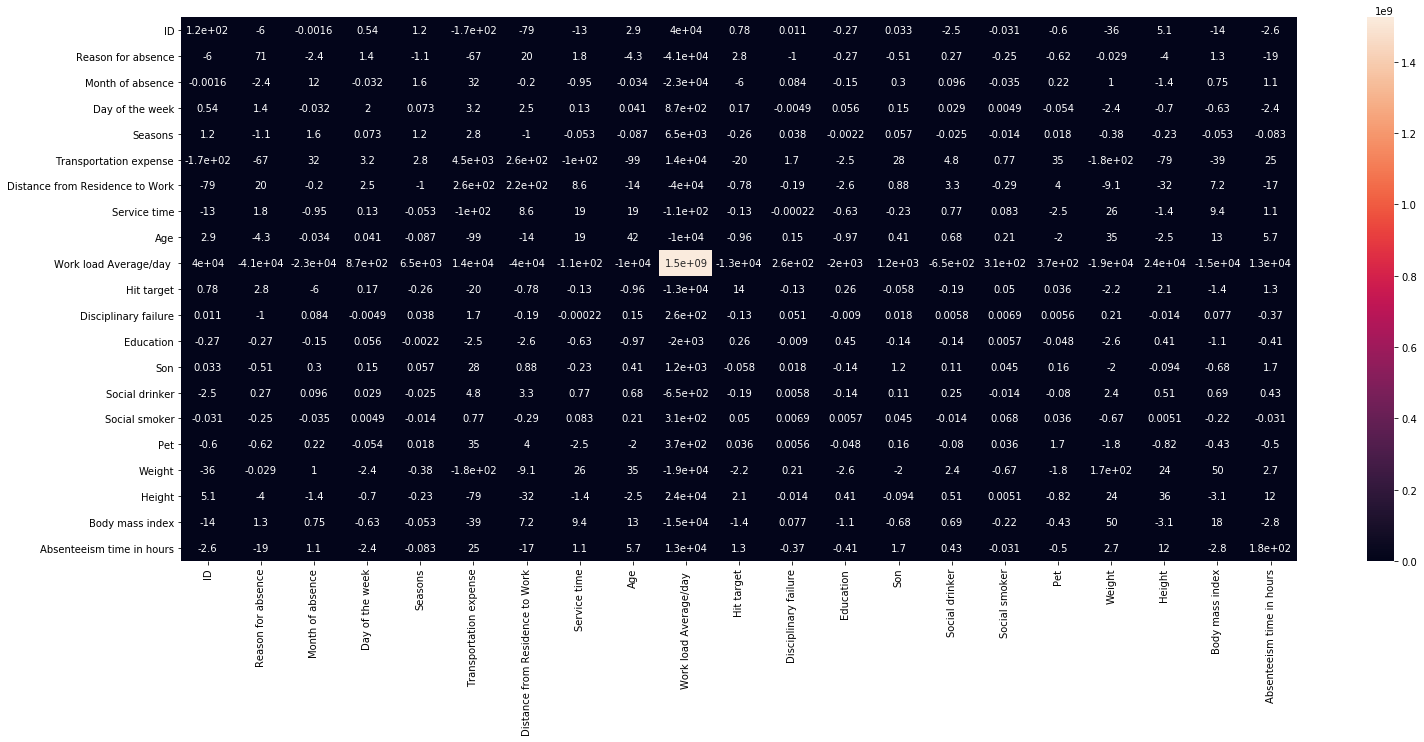

In [25]:
plt.figure(figsize=(25,10))
sns.heatmap(abs_df.cov(),annot=True)

In [26]:
#checking the skewness
abs_df.skew()

ID                                 0.016606
Reason for absence                -0.915312
Month of absence                   0.069369
Day of the week                    0.102440
Seasons                           -0.038532
Transportation expense             0.396189
Distance from Residence to Work    0.312083
Service time                      -0.004720
Age                                0.697703
Work load Average/day              0.961457
Hit target                        -1.261708
Disciplinary failure               3.952270
Education                          2.108953
Son                                1.086465
Social drinker                    -0.273327
Social smoker                      3.290333
Pet                                2.735715
Weight                             0.017001
Height                             2.566060
Body mass index                    0.305046
Absenteeism time in hours          5.720728
dtype: float64

# Removing The outliers and Skewness

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(abs_df))
print(z)

[[0.63716146 0.80493838 0.19676258 ... 0.01904601 0.77593223 0.21951111]
 [1.63271857 2.28012426 0.19676258 ... 0.97582783 1.00943766 0.51976661]
 [1.36352307 0.44896961 0.19676258 ... 0.35067062 1.00943766 0.36963886]
 ...
 [1.27272787 2.28012426 1.84169773 ... 0.35067062 1.70995395 0.51976661]
 [0.90954706 2.28012426 1.84169773 ... 0.35067062 1.94345938 0.51976661]
 [1.54192337 2.28012426 1.84169773 ... 0.47839091 0.39159492 0.51976661]]


In [28]:
threhold=3

In [29]:
print(np.where(z>3))#printing all the value position which are greater than the threshold value

(array([  1,   3,   8,  27,  31,  31,  33,  33,  38,  38,  44,  50,  51,
        54,  55,  58,  64,  83,  85,  89,  91,  99, 104, 116, 140, 157,
       158, 164, 165, 167, 169, 172, 180, 186, 188, 197, 199, 200, 203,
       203, 203, 205, 206, 210, 213, 213, 214, 215, 215, 216, 226, 231,
       232, 234, 236, 242, 245, 251, 253, 255, 256, 257, 270, 271, 272,
       273, 273, 274, 275, 276, 276, 277, 277, 278, 279, 280, 281, 282,
       283, 284, 285, 285, 286, 287, 288, 293, 294, 299, 300, 303, 311,
       312, 313, 313, 322, 323, 323, 325, 336, 336, 337, 337, 355, 360,
       362, 384, 396, 397, 400, 405, 406, 407, 420, 421, 432, 433, 434,
       446, 468, 469, 469, 471, 479, 481, 488, 498, 507, 510, 513, 521,
       530, 548, 549, 551, 562, 564, 569, 569, 572, 573, 575, 576, 577,
       579, 592, 594, 601, 603, 608, 620, 622, 622, 640, 647, 648, 652,
       661, 670, 675, 681, 682, 682, 683, 688, 690, 690, 691, 692, 692,
       695, 702, 703, 704, 706, 710, 712, 714, 714, 714, 715, 7

In [30]:
z[1][11]#checking the above output result

4.183300132670378

In [31]:
z[3][15]#checking the above output result

3.5642255405212087

In [32]:
abs_new=abs_df[(z<3).all(axis=1)]  #removing outliers

In [33]:
print("Shape of the dataset before removing outliers",abs_df.shape)
print("\n \n")
print("Shape of the dataset after removing the outliers",abs_new.shape)

Shape of the dataset before removing outliers (740, 21)

 

Shape of the dataset after removing the outliers (576, 21)


In [34]:
#afte rremoving outliers we are left with 576 rows

In [35]:
#cheking skewness after removing outliers
abs_new.skew()

ID                                -0.058065
Reason for absence                -1.027334
Month of absence                   0.109690
Day of the week                    0.082048
Seasons                           -0.019301
Transportation expense             0.327717
Distance from Residence to Work    0.199294
Service time                      -0.153111
Age                                0.517042
Work load Average/day              1.019484
Hit target                        -0.461369
Disciplinary failure               0.000000
Education                          1.990046
Son                                1.447470
Social drinker                    -0.188822
Social smoker                      0.000000
Pet                                1.721238
Weight                            -0.128296
Height                             1.449688
Body mass index                    0.037118
Absenteeism time in hours          3.171312
dtype: float64

In [36]:
#removing the Skewness
collist=abs_new.columns.values
for i in range(0,len(collist)):
    if abs_new.skew().loc[collist[i]]>0.55:
        abs_new[collist[i]]=np.sqrt(abs_new[collist[i]])

In [37]:
abs_new.skew()

ID                                -0.058065
Reason for absence                -1.027334
Month of absence                   0.109690
Day of the week                    0.082048
Seasons                           -0.019301
Transportation expense             0.327717
Distance from Residence to Work    0.199294
Service time                      -0.153111
Age                                0.517042
Work load Average/day              0.844140
Hit target                        -0.461369
Disciplinary failure               0.000000
Education                          1.959022
Son                                0.360208
Social drinker                    -0.188822
Social smoker                      0.000000
Pet                                0.813730
Weight                            -0.128296
Height                             1.408211
Body mass index                    0.037118
Absenteeism time in hours          1.438259
dtype: float64

# Splitting the data into training and testing sets

In [38]:
x=abs_new.iloc[:,:-1]

In [39]:
x.shape

(576, 20)

In [40]:
x.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,11,26,7,3,1,289,36,13,33,489.44254,97,0,1.0,1.414214,1,0,1.0,90,13.114877,30
2,3,23,7,4,1,179,51,18,38,489.44254,97,0,1.0,0.000000,1,0,0.0,89,13.038405,31
4,11,23,7,5,1,289,36,13,33,489.44254,97,0,1.0,1.414214,1,0,1.0,90,13.114877,30
5,3,23,7,6,1,179,51,18,38,489.44254,97,0,1.0,0.000000,1,0,0.0,89,13.038405,31
6,10,22,7,6,1,361,52,3,28,489.44254,97,0,1.0,1.000000,1,0,2.0,80,13.114877,27


In [41]:
y=abs_new.iloc[:,-1]

In [42]:
y.shape

(576,)

In [43]:
y.head()

0    2.000000
2    1.414214
4    1.414214
5    1.414214
6    2.828427
Name: Absenteeism time in hours, dtype: float64

In [44]:
#Scaling the data in x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)
x=df_x
print(x)

[[-0.63135694  0.72490314  0.20742767 ...  0.92877005  0.37848306
   0.74242082]
 [-1.33003436  0.30526072  0.20742767 ...  0.84736842 -0.25376988
   0.9827999 ]
 [-0.63135694  0.30526072  0.20742767 ...  0.92877005  0.37848306
   0.74242082]
 ...
 [-1.50470371 -1.37330896  0.20742767 ...  0.76596678  0.37848306
   0.50204173]
 [-0.89336097 -2.91199784 -1.78387794 ...  1.74278641 -0.25376988
   1.94431623]
 [ 1.46467532 -2.91199784 -1.78387794 ... -0.12945121  1.32000975
  -0.4594746 ]]


Impoting and applying PCA to minimize number of column

In [45]:
#y=np.array([y])

In [46]:
#from sklearn.decomposition import PCA
#pca = PCA(.95)
#the code above PCA(.95) is for the number of components parameter.
#It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

#pca.fit(x)


In [47]:
#pca.n_components

In [48]:
#x=pca.transform(x)


In [49]:
#y=y.reshape(-1,1)
#pca.fit(y)
#y=pca.transform(y)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor 

In [51]:
#Finding the best Random state

max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lm=LinearRegression() 
    lm.fit(x_train,y_train)
    lm.score(x_train,y_train)
    pred=lm.predict(x_test)
    r_score=r2_score(y_test,pred)
    print("R2 SCORE is equal to :",r_score,"at random state",i)
    
    if r_score > max_score:
        max_score=r_score
        final_rstate=i
print("The maximum r2_score is ",max_score, "at random state",final_rstate) 

R2 SCORE is equal to : 0.1977592981949693 at random state 42
R2 SCORE is equal to : 0.2385138607256757 at random state 43
R2 SCORE is equal to : 0.2139069816462219 at random state 44
R2 SCORE is equal to : 0.2599934463024557 at random state 45
R2 SCORE is equal to : 0.32569611384899955 at random state 46
R2 SCORE is equal to : 0.21728969946020904 at random state 47
R2 SCORE is equal to : 0.17223069501591015 at random state 48
R2 SCORE is equal to : 0.22194277016355157 at random state 49
R2 SCORE is equal to : 0.2865387730404939 at random state 50
R2 SCORE is equal to : 0.17092090361074097 at random state 51
R2 SCORE is equal to : 0.23032145809028481 at random state 52
R2 SCORE is equal to : 0.22837152829421692 at random state 53
R2 SCORE is equal to : 0.24043013791669277 at random state 54
R2 SCORE is equal to : 0.24716608778143112 at random state 55
R2 SCORE is equal to : 0.21905965079136258 at random state 56
R2 SCORE is equal to : 0.06338190461995885 at random state 57
R2 SCORE is e

In [52]:
#finalizing the train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=70)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(432, 20) (144, 20) (432,) (144,)


In [53]:
#using Lasso, Ridge And Elastic net to overcome overfit and underfit situation

In [54]:
from sklearn.linear_model import Lasso,Ridge

In [55]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
print("\n")
preed=ls.predict(x_test)
r_score=r2_score(y_test,preed)
print("The R2 score is",r_score)

0.26283269591634206


The R2 score is 0.34025226227378935


In [56]:
ri=Ridge(alpha=0.001)
ri.fit(x_train,y_train)
print(ri.score(x_train,y_train))
print("\n")
predd=ri.predict(x_test)
r_score=r2_score(y_test,predd)
print("The r2_score is",r_score)

0.26285025337966905


The r2_score is 0.34033675343403835


In [57]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
r_score=r2_score(y_test,enrpred)
print("The r2_score is",r_score)
enr.coef_

0.0
The r2_score is -6.777049134321089e-06


array([-0., -0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0., -0.,  0., -0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [58]:
from sklearn.model_selection import GridSearchCV
dtr=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae')}
gd=GridSearchCV(dtr,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'friedman_mse'}

In [59]:
from sklearn.model_selection import GridSearchCV
knr=KNeighborsRegressor()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knr,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 9}

In [60]:
from sklearn.model_selection import GridSearchCV
svr=SVR()
parameters={'kernel':('linear','poly','rbf')}
gd=GridSearchCV(svr,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'kernel': 'linear'}

In [61]:
Model= []
score= []
cvs=[]
rocscore=[]
model=[LinearRegression(),SVR(kernel='linear'),DecisionTreeRegressor(criterion='mae'),KNeighborsRegressor(n_neighbors=9)]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x_train,y_train)
    print(models)
    prediction=models.predict(x_test)
    print("\n")
    R2_score=r2_score(y_test,prediction)
    print("R2_SCORE =",R2_score)
    score.append(R2_score*100)
    print("\n")
    
    

    



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2_SCORE = 0.3403379409789997




SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


R2_SCORE = 0.32250822433215365




DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


R2_SCORE = 0.051170673579464365




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')


R2_SCORE = 0.24775362115920196




In [62]:
#Linear Regression is giving Good result hence finalizing it

In [63]:
#Applying boosting techniques to make the result better

In [64]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=lm, n_estimators=100)
ada.fit(x_train,y_train)
print(ada.score(x_train,y_train))
pred=ada.predict(x_test)
print("Predicted result",pred)
print("\n \n")
print("Actual result \n",y_test)

0.19916595295384806
Predicted result [2.2188556  0.97838079 2.07428992 2.1327768  2.67038935 2.31326101
 2.1996947  2.65361723 1.84703721 2.48045107 2.82583616 2.03439728
 1.66250207 2.29262008 2.39681838 1.58569003 3.11682352 1.80905178
 3.05703202 1.91050769 2.72280177 2.92871148 2.03600736 2.59980345
 2.49270527 2.539156   2.23721213 2.22620322 2.77340823 3.63908089
 1.60538282 1.42708538 3.51207819 1.74584398 1.63674231 2.64352856
 2.77798558 3.79173839 1.46346575 1.7637924  1.67363215 2.24144543
 1.62185292 1.54914486 2.18137305 1.96860303 2.47448078 1.76480334
 2.26267683 2.90019629 1.78133553 1.97717048 2.20594417 2.1840119
 1.84359605 4.16957688 3.31930808 2.85434252 1.91694561 2.02969747
 2.35002646 2.95944526 2.07746435 2.25715501 3.24326052 3.82385612
 1.67055268 2.65316338 2.23153167 2.5456535  1.71918543 2.27110903
 4.00884401 2.63889063 2.51592933 2.3817335  2.95565085 1.82421521
 1.98476522 2.29939942 2.03865138 1.64489645 2.22413127 1.62937956
 2.97549902 1.95588534 2.0

In [65]:
r_score=r2_score(y_test,pred)
print("The r2_Score after apllying Boosting Technique for Linear _Regression is", r_score)

The r2_Score after apllying Boosting Technique for Linear _Regression is 0.21128546781005675


In [66]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr=GradientBoostingRegressor(n_estimators=500,max_depth= 4 ,min_samples_split= 5,learning_rate=0.1,loss='ls')
gbr.fit(x_train,y_train)
print(gbr.score(x_train,y_train))
gbrpred=gbr.predict(x_test)
R2_score=r2_score(gbrpred,y_test)
print("R2 Score =", R2_score)

0.9532994868244438
R2 Score = 0.008385411804562981


In [67]:
lm=LinearRegression() 
lm.fit(x_train,y_train)
print(lm.score(x_train,y_train))
print("\n")
preed=lm.predict(x_test)
r_score=r2_score(y_test,preed)
print("The R2 score is",r_score)

0.2628502563387983


The R2 score is 0.3403379409789997


In [68]:
#saving the model with Linear regression 
from sklearn.externals import joblib
joblib.dump(lm,"lm__Absenteeism_at_work.pkl")

['lm__Absenteeism_at_work.pkl']